<a href="https://colab.research.google.com/github/Mamatha121993/Amazon_sales_Analysis_over_india/blob/main/ML_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection

##objective
Ensuring the security of credit card
 transactions is very important. The objective of this project is to develop a robust machine
 learning model capable of accurately detecting fraudulent credit card transactions in real-time.

##This is classification model Target is Is_Fraudlent(yes,or no)

##Basic libraries to analyse data

**Data set overview**
- Transaction_ID'-  Unique customer id
- 'Card_Type' - Mastercard,American Express,Visa,RuPay
- 'Merchant_Category': - Retail, online shoping, etc
- 'Transaction_Amount: - Rs in thousands
-  'Transaction_DateTime: - customer done transcation time
-  'Location: - over all idia
- 'Cardholder_Age:25-99
- 'Cardholder_Gender:Male,Femal
-  'Cardholder_Monthly_Income:10k to 100k
- 'Cardholder_Average_Spend:monthly spend amount
- 'Credit_Limit:50k to 200k
- 'Device_Type':Device,mobile,Contactless device
- 'Day_of_Week:Mon to Sun
- 'Is_Fraudulent: Yes, no

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
link= ' https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv'
df=pd.read_csv(link)
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [3]:
df.columns

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_Amount', 'Transaction_DateTime', 'Location', 'Region',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type',
       'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

##size of the data

In [5]:
df.shape

(5000, 15)

##Checking unique values

In [6]:
for col in df.columns:
  print(f"{col}:{df[col]}")
  df[col].unique()

Transaction_ID:0       W963UK57
1       V606KV56
2       R531NU70
3       T783GF79
4       K256ZN73
          ...   
4995    N307EM82
4996    J752EG45
4997    S458OS59
4998    E863PD98
4999    D501WH15
Name: Transaction_ID, Length: 5000, dtype: object
Card_Type:0             Mastercard
1       American Express
2                   Visa
3                  RuPay
4                  RuPay
              ...       
4995               RuPay
4996    American Express
4997                Visa
4998               RuPay
4999                Visa
Name: Card_Type, Length: 5000, dtype: object
Merchant_Category:0          Utility bill
1                Retail
2        Transportation
3       Online Shopping
4                Retail
             ...       
4995          Education
4996    Online Shopping
4997         Healthcare
4998      Entertainment
4999         Healthcare
Name: Merchant_Category, Length: 5000, dtype: object
Transaction_Amount:0        27214.0
1        83956.0
2       193280.0
3       16738

##Checking null values

In [7]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [8]:
# Analyze the distribution of categorical features such as Card_Type,Merchant_Category,Location,etc
df.describe()




,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


#Univariant of is_fraudlent

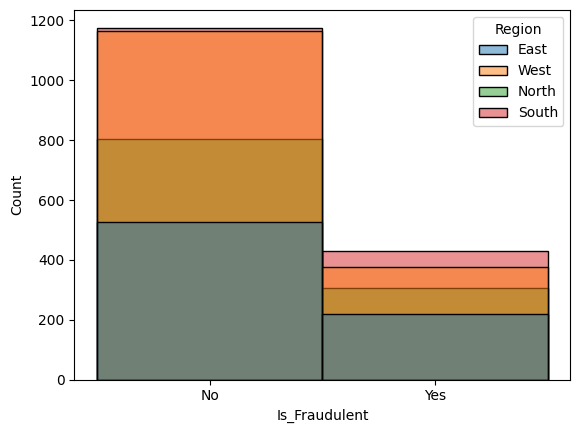

In [9]:

sns.histplot(x='Is_Fraudulent',hue='Region',data=df)
plt.show()

#Bivariate reletionship wirh tranascation amount and carholder_age by is_fraudlent

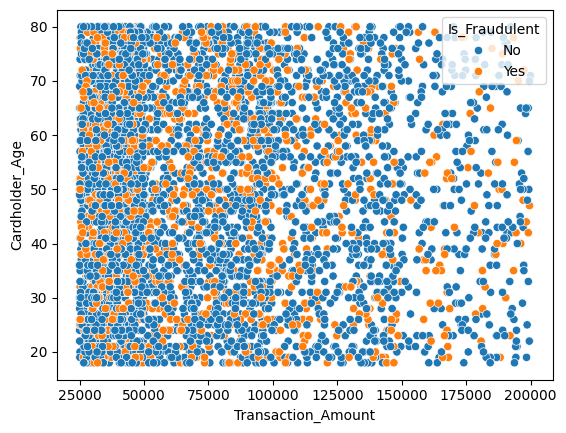

In [10]:
sns.scatterplot(x='Transaction_Amount',y='Cardholder_Age',hue='Is_Fraudulent',data=df)
plt.show()

#Mutlivariate analysis with multiplr variable

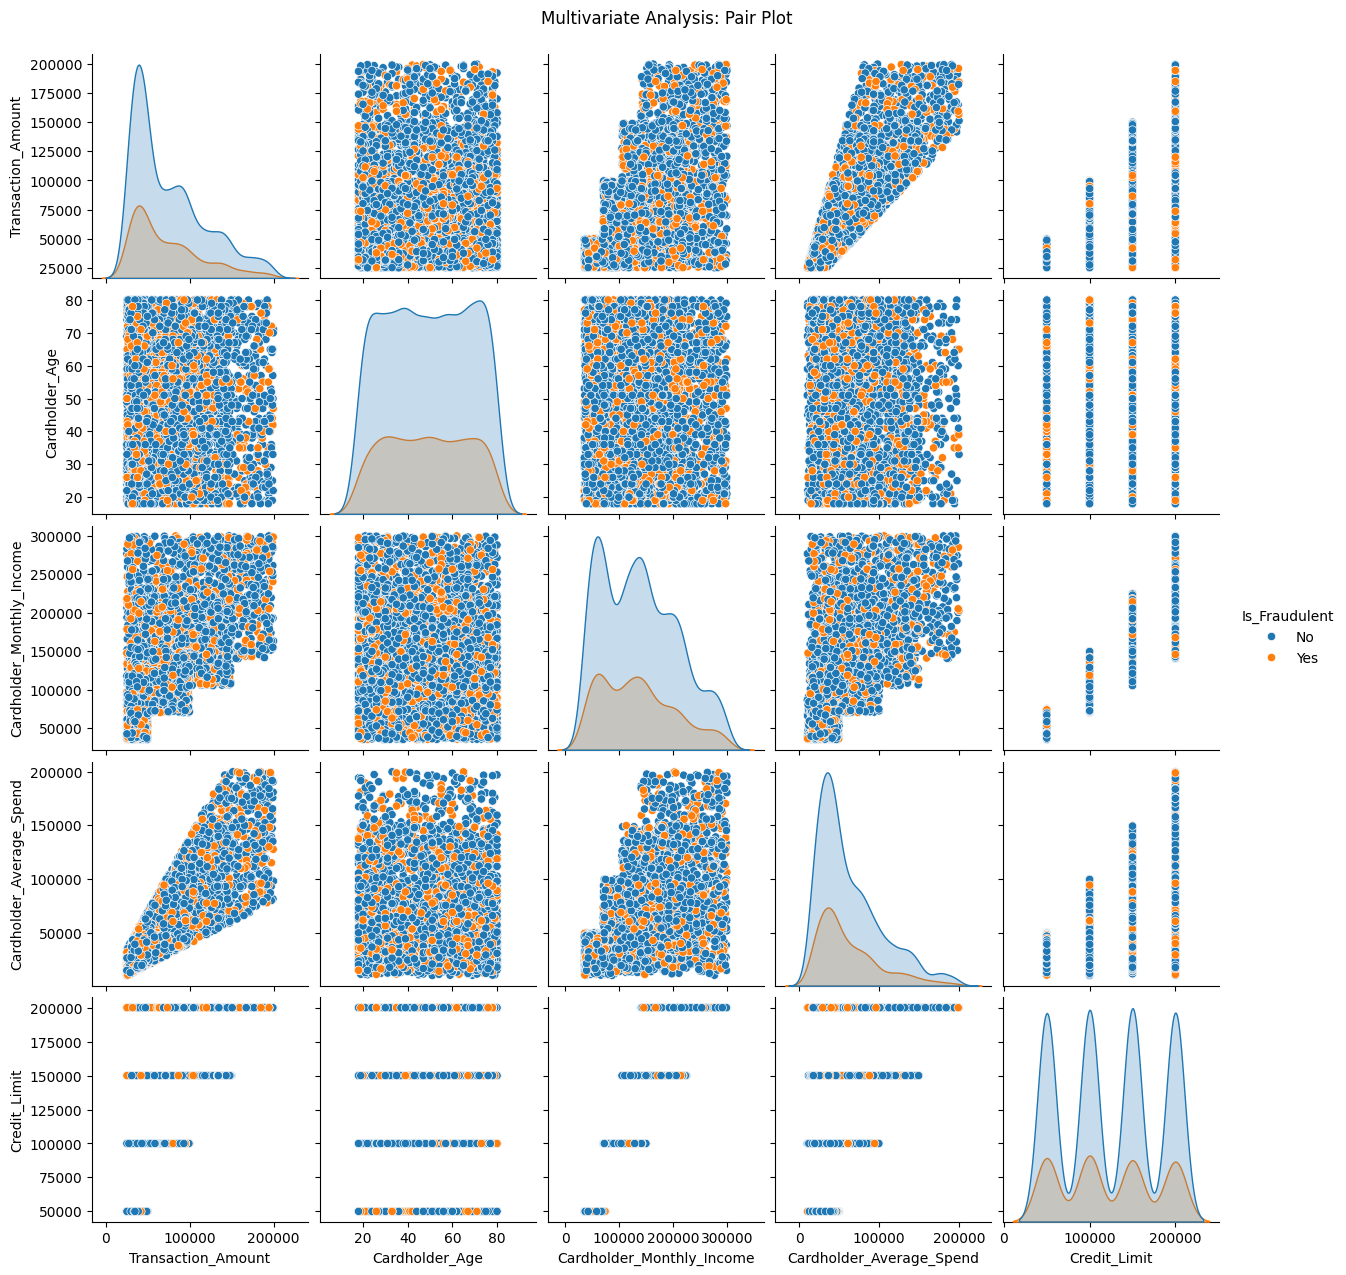

In [11]:
sns.pairplot(df, hue='Is_Fraudulent')
plt.suptitle('Multivariate Analysis: Pair Plot', y=1.02)
plt.show()

#histogram analysis between fraud or not fraud

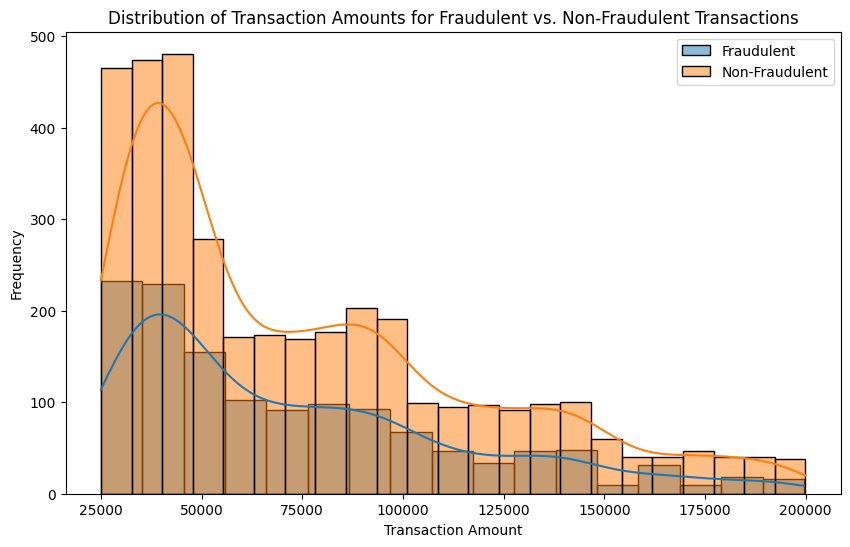

In [12]:
#Visualizethedistributionoftransactionamountsforfraudulentvs.non-fraudulenttransactionsusinghistograms.
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Is_Fraudulent'] == 'Yes']['Transaction_Amount'], label='Fraudulent', kde=True)
sns.histplot(df[df['Is_Fraudulent'] == 'No']['Transaction_Amount'], label='Non-Fraudulent', kde=True)
plt.title('Distribution of Transaction Amounts for Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Boxplot analysis between fraud or not fraud

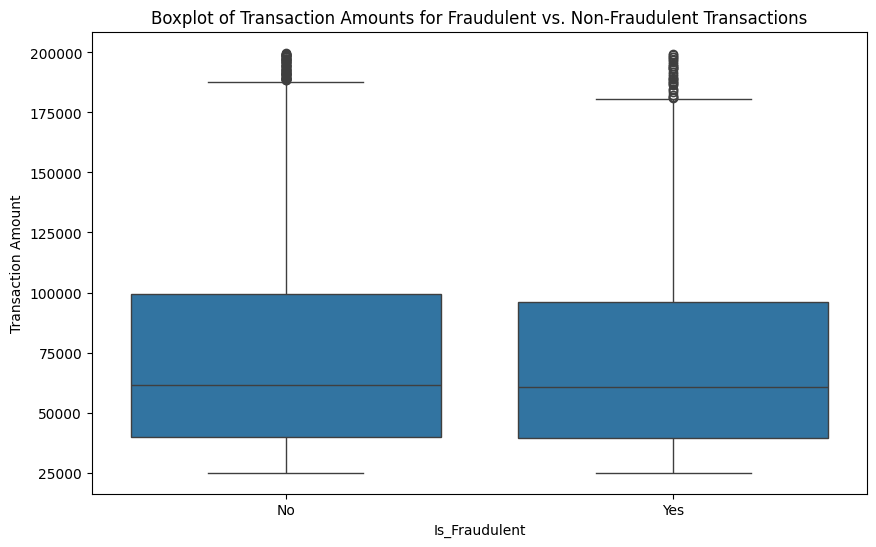

In [13]:
#boxplot frud vs not fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is_Fraudulent', y='Transaction_Amount', data=df)
plt.title('Boxplot of Transaction Amounts for Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is_Fraudulent')
plt.ylabel('Transaction Amount')
plt.show()

#Correlation of Numeric Features with Fraud

In [14]:
# Investigate whether certain features are more susceptible to fraud
numeric_features= ['Transaction_Amount','Cardholder_Age','Cardholder_Monthly_Income','Cardholder_Average_Spend']
numeric_features

['Transaction_Amount',
 'Cardholder_Age',
 'Cardholder_Monthly_Income',
 'Cardholder_Average_Spend']

Transaction_Amount          -0.019470
Cardholder_Age              -0.003061
Cardholder_Monthly_Income   -0.018481
Cardholder_Average_Spend    -0.013361
dtype: float64


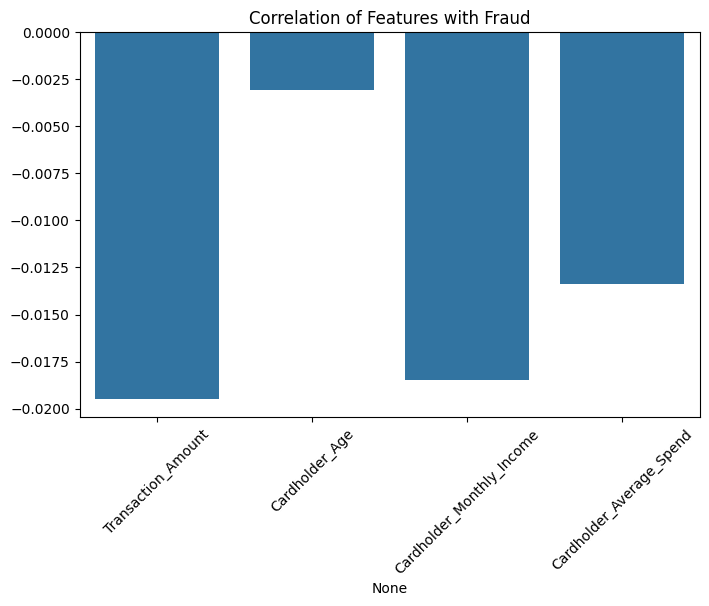

In [15]:
corr = df[numeric_features].corrwith(df['Is_Fraudulent'] == 'Yes')
print(corr)
# Visualize
plt.figure(figsize=(8, 5))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=45)
plt.title('Correlation of Features with Fraud')
plt.show()

## Data Preprocessing- Data Cleaning##

In [19]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [20]:
df

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No


#Count Null value columns

In [21]:
for col in df.columns:
  if df[col].isnull().sum()>0:
    print(f"{col}:{df[col].isnull().sum()}")

Card_Type:17
Merchant_Category:22
Transaction_Amount:6
Cardholder_Age:135
Cardholder_Gender:89
Cardholder_Monthly_Income:314
Cardholder_Average_Spend:208
Credit_Limit:9
Device_Type:40


In [22]:
category_column=['Card_Type','Merchant_Category','Device_Type','Cardholder_Gender']
category_column




['Card_Type', 'Merchant_Category', 'Device_Type', 'Cardholder_Gender']

#fill null values only category column

In [23]:
#fill null values
for col in category_column:
  df[col].fillna(df[col].mode()[0],inplace=True)



/tmp/ipython-input-23-2999439195.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [24]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,0
Cardholder_Monthly_Income,314


#Select numerical columns

In [25]:
numerical_column=['Transaction_Amount','Cardholder_Age','Cardholder_Monthly_Income','Credit_Limit','Cardholder_Average_Spend']
numerical_column

['Transaction_Amount',
 'Cardholder_Age',
 'Cardholder_Monthly_Income',
 'Credit_Limit',
 'Cardholder_Average_Spend']

#fill null values only numerical column

In [26]:
for col in numerical_column:
  df[col].fillna(df[col].mean(),inplace=True)

/tmp/ipython-input-26-4085269589.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


#Now full filled all null values

In [27]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0


##Before remove outliers
#Checking Outliers


<Axes: >

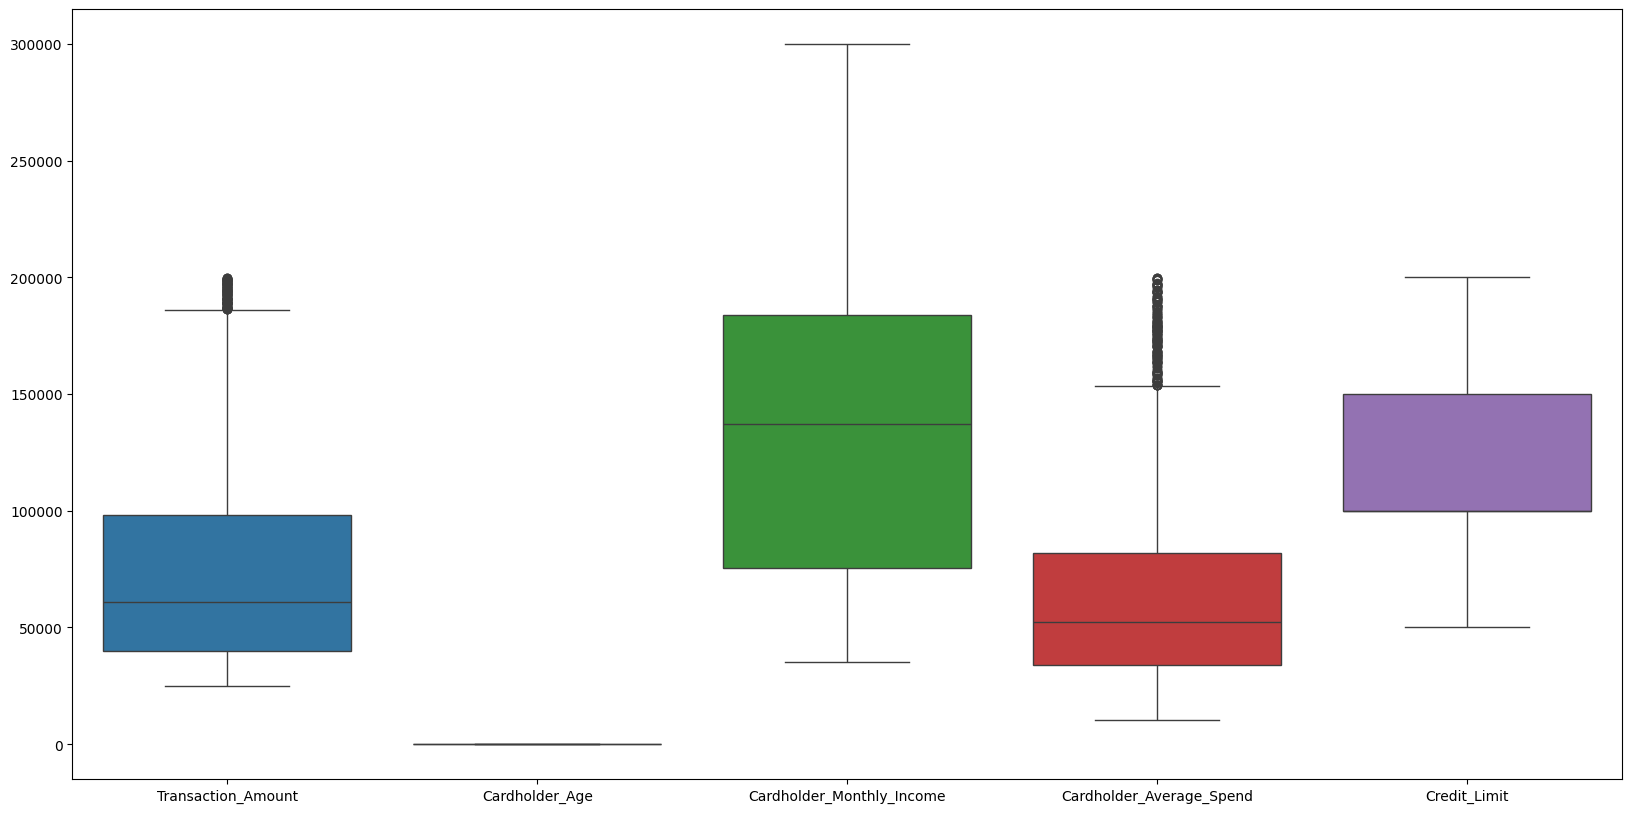

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(df)

In [29]:
outlier_col=['Transaction_Amount','Cardholder_Average_Spend']


In [30]:
for col in outlier_col:
   q1=df[col].quantile(0.25)
   q3=df[col].quantile(0.75)
   IQR= q3-q1
   lower= q1-1.5* IQR
   upper=q3+1.5* IQR
   df=df[(df[col]>=lower) &(df[col]<=upper)]
   df[col]

#After remove outliers

<Axes: >

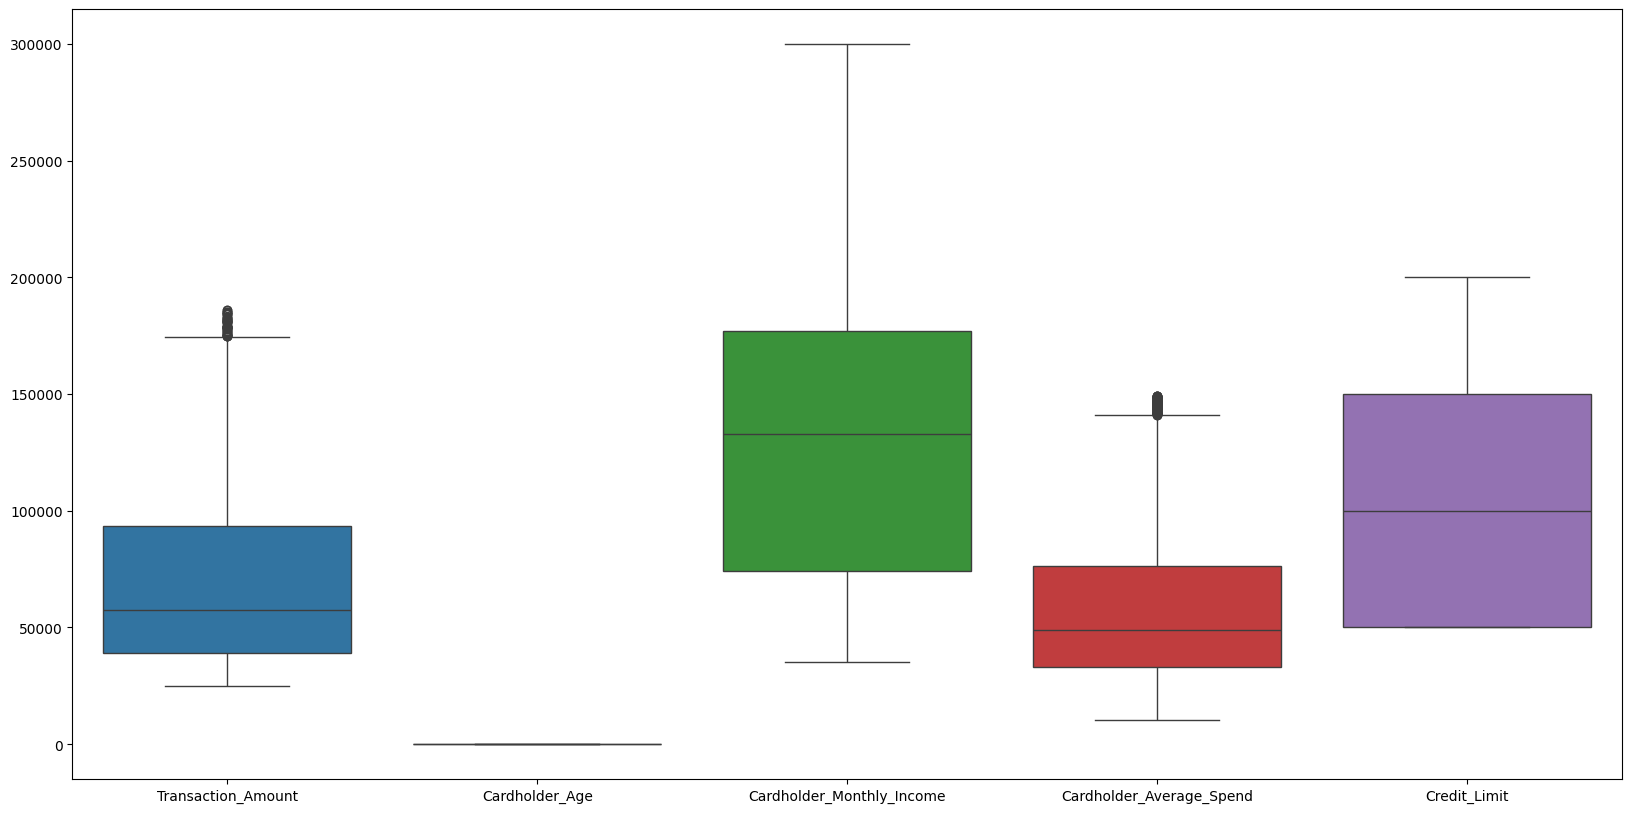

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(df)

In [32]:
df['Transaction_Amount'].std()

37835.45593344391

In [33]:
df['Transaction_Amount'].mean()

np.float64(69704.21006826396)

#If mean <3 apply zscore method
- In this data no need to apply zscore method

In [34]:
from scipy.stats import skew

In [35]:
df[numerical_column].skew()

,0
Transaction_Amount,0.934316
Cardholder_Age,-0.010689
Cardholder_Monthly_Income,0.494859
Credit_Limit,0.091207
Cardholder_Average_Spend,0.899651


In [36]:
df['Transaction_Amount'].skew()

np.float64(0.9343163226542156)

In [37]:
df['Cardholder_Average_Spend'].skew()

np.float64(0.8996510282876518)

#No need apply skew here coz its equal to 0
- Its normal distribution

In [39]:
df[col]

,Cardholder_Average_Spend
0,-0.666224
1,0.965826
4,-0.161139
5,0.694309
6,0.812435
...,...
4995,-0.733507
4996,-1.181998
4997,-0.743260
4998,-0.770726


##Feature Engineering

In [40]:
df

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,-1.123145,2020-01-01 09:43:17,Patna,East,-1.439688,Female,-0.588519,-0.666224,-0.380804,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,0.376718,2020-01-03 16:26:13,Surat,West,-0.008603,Male,0.228652,0.965826,0.541080,Desktop,Friday,No
4,K256ZN73,RuPay,Retail,0.303075,2020-01-04 17:26:47,Lucknow,North,-0.669104,Female,0.631264,-0.161139,1.462963,Mobile,Saturday,No
5,I812SG19,RuPay,Entertainment,1.644498,2020-01-04 19:55:12,Mumbai,West,1.697692,Male,0.512109,0.694309,0.541080,Point-of-Sale Terminal,Saturday,No
6,Y182UO40,Visa,Retail,1.832649,2020-01-05 16:33:10,Surat,West,-0.889271,Male,0.593389,0.812435,0.541080,Desktop,Sunday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,RuPay,Education,-0.877476,2023-12-29 09:22:23,Delhi,North,-0.889271,Female,-1.071571,-0.733507,-1.302688,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,-0.707988,2023-12-29 19:59:13,Chennai,South,-0.002731,Female,0.064195,-1.181998,-0.380804,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,-0.949374,2023-12-30 07:06:38,Pune,West,0.376690,Male,-1.104373,-0.743260,-1.302688,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,-0.820090,2023-12-30 07:50:02,Chennai,South,0.596857,Male,-1.011481,-0.770726,-1.302688,Desktop,Saturday,No


##Encoding the category label

In [41]:
category=['Card_Type','Merchant_Category','Location','Region','Cardholder_Gender','Device_Type','Day_of_Week','Is_Fraudulent']

In [42]:
from sklearn.preprocessing import LabelEncoder
for cat in category:
  le=LabelEncoder()
  df[cat]=le.fit_transform(df[cat])
  df[cat].unique()


In [43]:
df.head(10)

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,1,7,-1.123145,2020-01-01 09:43:17,10,0,-1.439688,0,-0.588519,-0.666224,-0.380804,4,6,0
1,V606KV56,0,5,0.376718,2020-01-03 16:26:13,12,3,-0.008603,1,0.228652,0.965826,0.541080,1,0,0
4,K256ZN73,2,5,0.303075,2020-01-04 17:26:47,8,1,-0.669104,0,0.631264,-0.161139,1.462963,2,2,0
5,I812SG19,2,2,1.644498,2020-01-04 19:55:12,9,3,1.697692,1,0.512109,0.694309,0.541080,3,2,0
6,Y182UO40,3,5,1.832649,2020-01-05 16:33:10,12,3,-0.889271,1,0.593389,0.812435,0.541080,1,3,1
7,R809YU99,2,4,-0.521714,2020-01-05 19:37:50,12,3,-0.173728,0,-1.174958,-0.378741,-1.302688,3,3,0
8,Q473IV29,1,2,-0.665483,2020-01-05 19:55:48,7,0,-0.283811,1,-0.600405,-0.873777,-0.380804,4,3,0
9,V841LV15,1,5,-1.060419,2020-01-05 23:30:04,10,0,1.532567,0,-1.187181,-1.093927,-1.302688,3,3,0
10,D105RT88,2,1,-0.159053,2020-01-07 09:57:23,7,0,0.596857,0,0.552352,0.033325,0.541080,0,5,0
11,Z447QC37,1,2,3.037360,2020-01-07 17:52:01,1,2,1.642650,1,2.245867,1.757483,1.462963,1,5,0


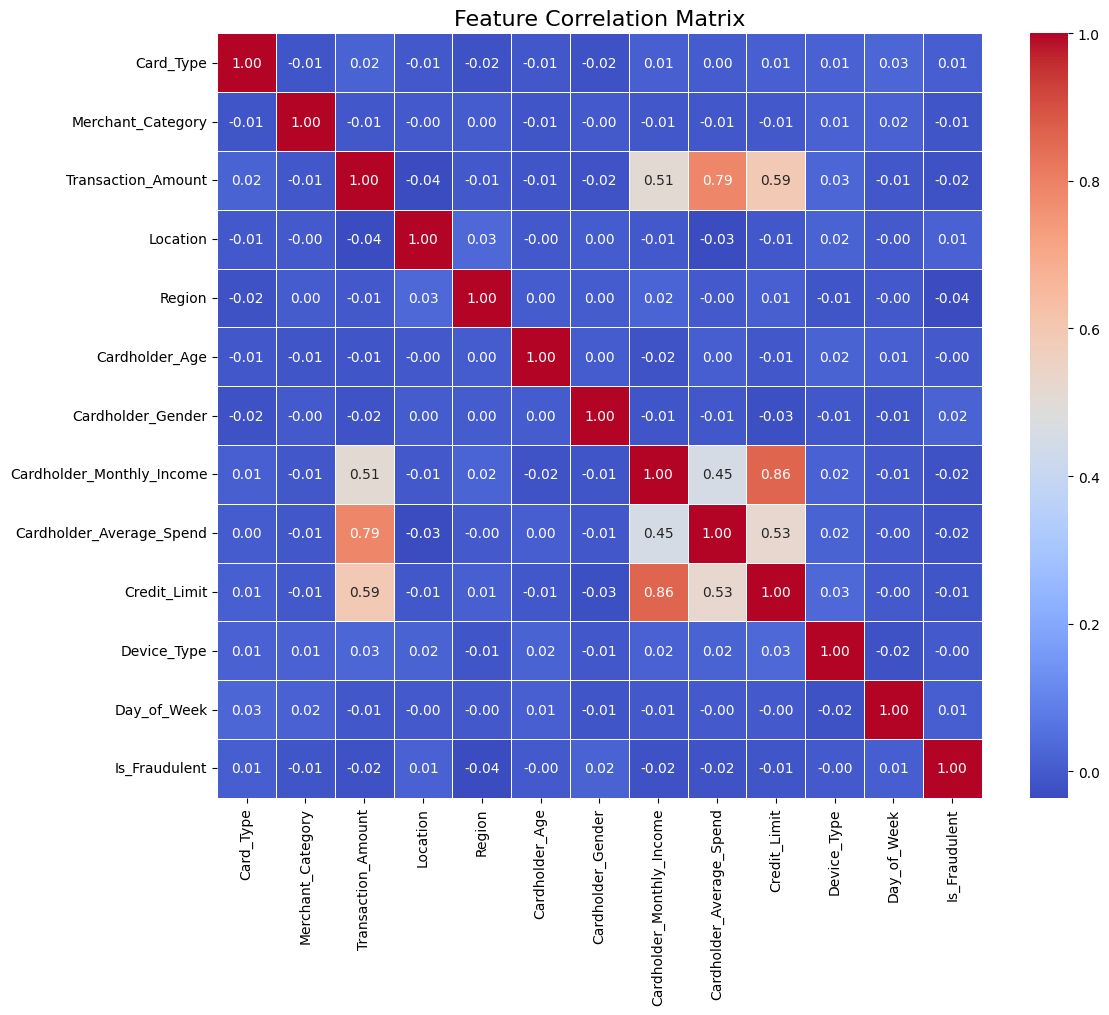

In [109]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

##No duplicated rows in this data set

In [44]:
df.duplicated().sum()

np.int64(0)

In [45]:
df.shape

(4746, 15)

## Feature Selection

In [46]:
# Select relevant features that have the most impact on predicting fraudulent transaction
X=df.drop(['Transaction_ID','Transaction_DateTime','Is_Fraudulent'],axis=1)
y=df['Is_Fraudulent']


In [47]:
X

,Card_Type,Merchant_Category,Transaction_Amount,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week
0,1,7,-1.123145,10,0,-1.439688,0,-0.588519,-0.666224,-0.380804,4,6
1,0,5,0.376718,12,3,-0.008603,1,0.228652,0.965826,0.541080,1,0
4,2,5,0.303075,8,1,-0.669104,0,0.631264,-0.161139,1.462963,2,2
5,2,2,1.644498,9,3,1.697692,1,0.512109,0.694309,0.541080,3,2
6,3,5,1.832649,12,3,-0.889271,1,0.593389,0.812435,0.541080,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,1,-0.877476,3,1,-0.889271,0,-1.071571,-0.733507,-1.302688,0,0
4996,0,4,-0.707988,2,2,-0.002731,0,0.064195,-1.181998,-0.380804,0,0
4997,3,3,-0.949374,11,3,0.376690,1,-1.104373,-0.743260,-1.302688,1,2
4998,2,2,-0.820090,2,2,0.596857,1,-1.011481,-0.770726,-1.302688,1,2


In [48]:
y

,Is_Fraudulent
0,0
1,0
4,0
5,0
6,1
...,...
4995,1
4996,0
4997,0
4998,0


In [49]:
X.shape

(4746, 12)

In [50]:
y.shape

(4746,)

## Split data into training and testing

In [51]:
# Ensure that both sets maintain the same distribution of fraudulent and non-fraudulent transactions to avoid data leakage
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [52]:
X_train.shape

(3796, 12)

In [53]:
y_train.shape

(3796,)

In [54]:
X_test.shape

(950, 12)

In [55]:
y_test.shape

(950,)

##Check distribution

In [56]:
print("Original:", y.value_counts(normalize=True))
print("Train:", y_train.value_counts(normalize=True))
print("Test:", y_test.value_counts(normalize=True))

Original: Is_Fraudulent
0    0.733881
1    0.266119
Name: proportion, dtype: float64
Train: Is_Fraudulent
0    0.732086
1    0.267914
Name: proportion, dtype: float64
Test: Is_Fraudulent
0    0.741053
1    0.258947
Name: proportion, dtype: float64


##Scalling the feature

In [57]:
# Scale numerical features to ensure that they have the same magnitude, preventing somefeatures from dominating others during model training
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [58]:
X_train

array([[-0.82917905, -0.33310807, -0.46019516, ...,  0.53864525,
        -0.7253092 ,  1.00381247],
       [-0.82917905, -0.33310807, -0.36717093, ..., -0.38527986,
         0.67264648, -1.53042013],
       [ 1.06124958,  0.62920413,  0.49392277, ...,  1.46257036,
        -0.02633136, -1.53042013],
       ...,
       [-0.82917905, -1.77657637,  1.8123834 , ...,  1.46257036,
         1.37162432, -1.53042013],
       [ 0.11603527,  0.62920413,  0.33518735, ...,  0.53864525,
        -0.7253092 ,  1.00381247],
       [ 0.11603527,  0.62920413, -0.39030041, ...,  1.46257036,
        -0.7253092 , -0.51672709]])

In [59]:
X_test

array([[-0.82917905, -1.29542027,  0.4497689 , ...,  1.46257036,
         0.67264648, -0.00988057],
       [ 1.06124958,  0.14804803, -0.67496895, ..., -0.38527986,
        -0.02633136, -1.53042013],
       [-0.82917905,  0.14804803,  1.16728925, ...,  1.46257036,
         1.37162432, -1.02357361],
       ...,
       [-0.82917905, -1.77657637,  1.21679914, ...,  1.46257036,
        -1.42428704,  1.00381247],
       [-0.82917905, -0.81426417, -0.51596706, ..., -0.38527986,
        -1.42428704,  1.51065899],
       [ 1.06124958,  0.14804803, -0.9200136 , ..., -1.30920498,
        -0.7253092 , -1.53042013]])

oringinal data set

In [60]:
df.shape

(4746, 15)

training data

In [61]:
X_train.shape

(3796, 12)

testing data

In [62]:
X_test.shape

(950, 12)

##Build the Machine Learning Model

#Clasification model


In [63]:
# Import the necessary modules and libraries for building and evaluating machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report, confusion_matrix

#All modules in one library

In [73]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC()
}

# Evaluate classifiers

results = []

for name, model in classifiers.items():
    model.fit(X_train, y_train) #train
    y_pred = model.predict(X_test) #predict

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='weighted')

    #print(f"\n {name} Evaluation:")
    #print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [80]:
print("confusion matrix" ,confusion_matrix(y_test, y_pred))
print("\n Model Comparison:\n")
results_df.sort_values(by='F1 Score', ascending=False)

confusion matrix [[697   7]
 [245   1]]

 Model Comparison:



,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.737895,0.200000,0.004065,0.631217
0,Logistic Regression,0.741053,0.000000,0.000000,0.630836
1,Naive Bayes,0.741053,0.000000,0.000000,0.630836
5,SVM,0.741053,0.000000,0.000000,0.630836
4,K-Nearest Neighbors,0.668421,0.236641,0.126016,0.630367
2,Decision Tree,0.603158,0.261818,0.292683,0.610030


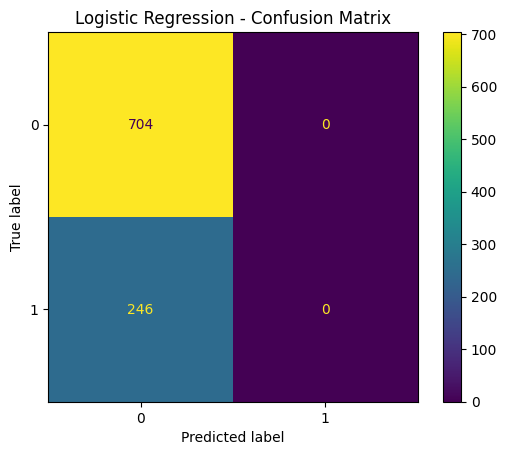

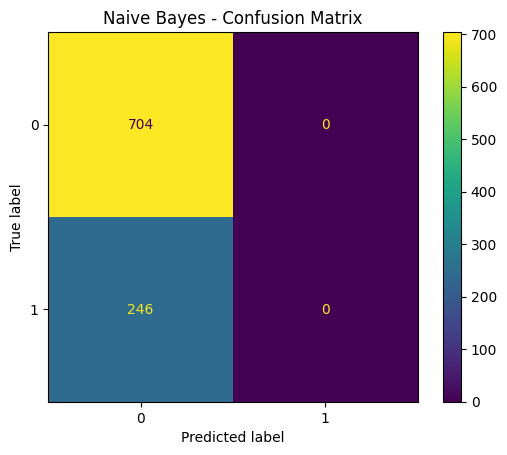

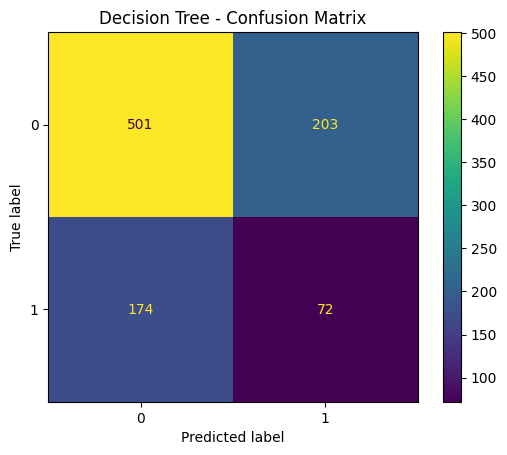

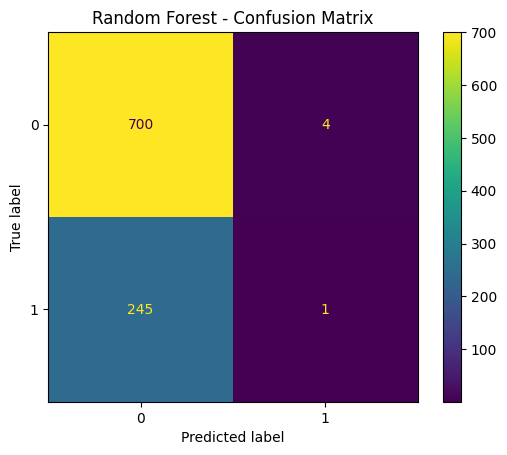

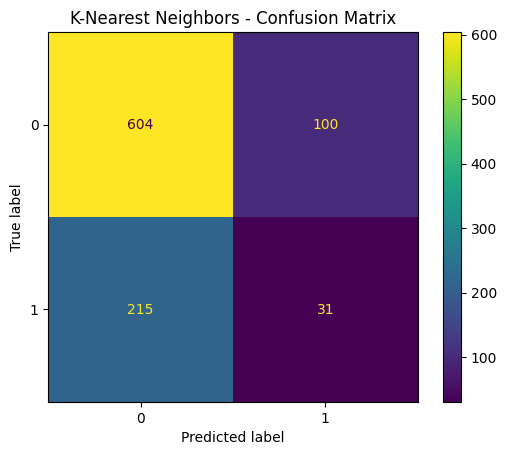

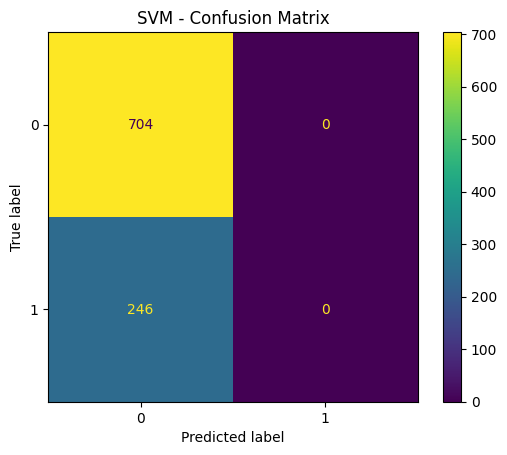

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in classifiers.items():
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

##Random Forest - F1-score: 63%, Accuracy: 73%

In [77]:
from sklearn.model_selection import GridSearchCV

##Hyper tuning for best model

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.12      0.00      0.01       246

    accuracy                           0.73       950
   macro avg       0.43      0.50      0.43       950
weighted avg       0.58      0.73      0.63       950

 Confusion Matrix:
 [[697   7]
 [245   1]]


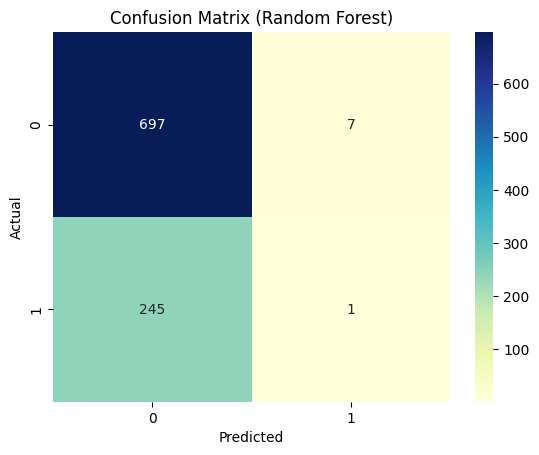

In [81]:
#Hyper tuning random forest
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV for best parameters
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,
                    scoring='f1_macro', n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

# Best model
best_rf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predict and evaluate
y_pred = best_rf.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#heat map
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- **True Positives (TP)**: 1  
- **False Negatives (FN)**: 245  
- **False Positives (FP)**: 7  
- **True Negatives (TN)**: 697  

- This shows the model struggles to detect fraudulent transactions (very low recall), reinforcing the need for **resampling** and **threshold tuning**.

---



##SMOTE(Synthetic Minority Oversampling Technique.) It's a method used to balance imbalanced datasets, especially for classification problems like fraud detection, where one class (e.g., fraud) is much rarer than the other.

Original class distribution:
 Counter({np.int64(0): 758, np.int64(1): 42})
After SMOTE: Counter({np.int64(0): 758, np.int64(1): 758})


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


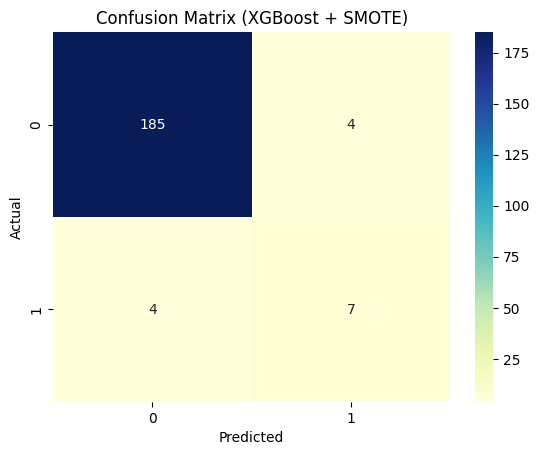

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       189
           1       0.64      0.64      0.64        11

    accuracy                           0.96       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.96      0.96      0.96       200



In [87]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated example (for demo purposes)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.95, 0.05], random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#  Apply SMOTE
print("Original class distribution:\n", Counter(y_train))
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_resampled))

# Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_resampled, y_resampled)

# Predict & Evaluate
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix (XGBoost + SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=2))
